<a href="https://colab.research.google.com/github/AsifShaafi/LinkedIn-Deep-Learning-Foundations-Natural-Language-Processing-with-TensorFlow/blob/main/03_04_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yelp Review Classifier
This notebook serves as a challenge to implement and explore LSTM and Convolution model over the new Yelp review dataset. You have to fill up all the blanks with the hyperparameters that helps you get the best accuracy and loss.

In [2]:
##import the required libraries and APIs
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print(tf.__version__)

device_name = tf.test.gpu_device_name()

if device_name != '':
  print('Found GPU at: {}'.format(device_name))
else:
  print('No GPU found')

2.15.0
Found GPU at: /device:GPU:0


## Downloading the TensorFlow `yelp_popularity_review` dataset

> Make sure tensorflow_datasets is installed

In [3]:
##load the yelp reviews dataset
data, info = tfds.load("yelp_polarity_reviews", with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/560000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/yelp_polarity_reviews/0.2.0.incompleteRLBEQT/yelp_polarity_reviews-train.t…

Generating test examples...:   0%|          | 0/38000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/yelp_polarity_reviews/0.2.0.incompleteRLBEQT/yelp_polarity_reviews-test.tf…

Dataset yelp_polarity_reviews downloaded and prepared to /root/tensorflow_datasets/yelp_polarity_reviews/0.2.0. Subsequent calls will reuse this data.


In [4]:
train_data, test_data = data['train'], data['test']

train_sentences = []
test_sentences = []

train_labels = []
test_labels = []

In [5]:
for sent, label in train_data:
    train_sentences.append(str(sent.numpy().decode('utf8')))
    train_labels.append(label.numpy())

for sent, label in test_data:
    test_sentences.append(str(sent.numpy().decode('utf8')))
    test_labels.append(label.numpy())


train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [6]:
##define the parameters for tokenizing and padding
vocab_size = 20000
embedding_dim = 64
max_length = 200
padding_type = 'post'
trunc_type='post'
oov_tok = "<OOV>"

In [7]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

##training sequences and labels
train_seqs = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_seqs,maxlen=max_length, truncating=trunc_type)

##testing sequences and labels
test_seqs = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_seqs,maxlen=max_length)

## Explore the LSTM & CNN model with the following layers:
1. Embedding layer
2. Try two bidirectional LSTM layers or a Conv1D layer or both.
3. Dense layer with 24 nodes
4. Output Dense layer with `sigmoid` activation

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 64)           1280000   
                                                                 
 bidirectional (Bidirection  (None, 200, 256)          197632    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               164352    
 onal)                                                           
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1646145 (6.28 MB)
Trainable params: 164614

In [10]:
num_epochs = 10
history = model.fit(
    train_padded,
    train_labels,
    epochs=num_epochs,
    validation_data=(test_padded, test_labels)
    )

Epoch 1/10
17500/17500 [==============================] - 638s 36ms/step - loss: 0.1762 - accuracy: 0.9303 - val_loss: 0.1230 - val_accuracy: 0.9521
Epoch 2/10
17500/17500 [==============================] - 553s 32ms/step - loss: 0.1167 - accuracy: 0.9559 - val_loss: 0.1119 - val_accuracy: 0.9593
Epoch 3/10
17500/17500 [==============================] - 558s 32ms/step - loss: 0.0941 - accuracy: 0.9649 - val_loss: 0.1073 - val_accuracy: 0.9609
Epoch 4/10
17500/17500 [==============================] - 551s 31ms/step - loss: 0.0750 - accuracy: 0.9729 - val_loss: 0.1148 - val_accuracy: 0.9584
Epoch 5/10
17500/17500 [==============================] - 561s 32ms/step - loss: 0.0574 - accuracy: 0.9797 - val_loss: 0.1393 - val_accuracy: 0.9549
Epoch 6/10
17500/17500 [==============================] - 563s 32ms/step - loss: 0.0437 - accuracy: 0.9850 - val_loss: 0.1369 - val_accuracy: 0.9555
Epoch 7/10
17500/17500 [==============================] - 569s 33ms/step - loss: 0.0336 - accuracy: 0.9885

## Visualise the accuracy and loss

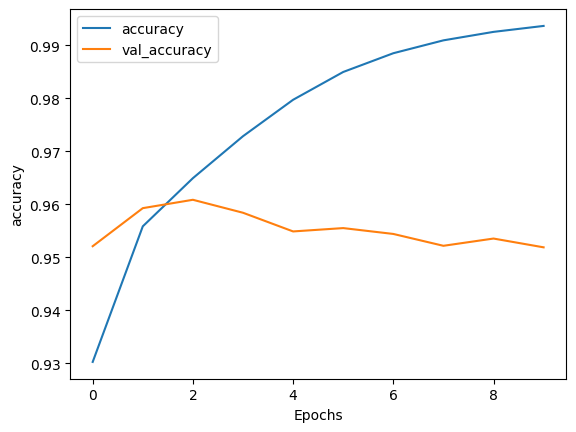

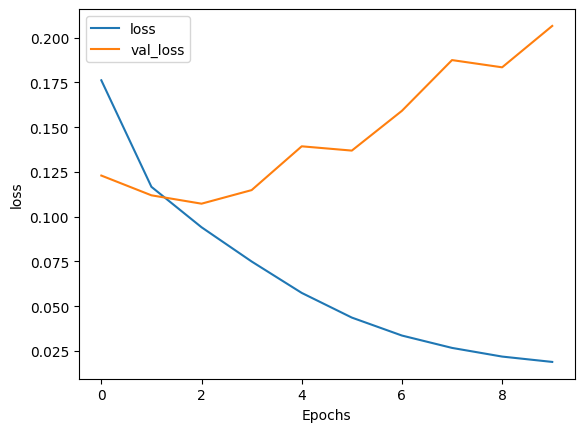

In [11]:
import matplotlib.pyplot as plt


def plot_metrics(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric])
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

plot_metrics(history, "accuracy")
plot_metrics(history, "loss")

## Classify new reviews

In [12]:
sentence = ["the restaurant served a delicious pasta", "the restaurant didn't have a decent ambience"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

1/1 [==============================] - 1s 1s/step
[[0.5717238 ]
 [0.25921956]]
